# BUSINESS PROBLEM

### Predict how many points NBA players scored in the 2013-2014 season.


# IMPORTING LIBRARIES

In [474]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# READING .csv FILE

In [475]:
nba = pd.read_csv('C:/Users/aish2/Documents/LSS/nba_2013.csv')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)



In [476]:
nba

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013
5,Cole Aldrich,C,25,NYK,46,2,330,33,61,0.541,0,0,NaN,33,61,0.540984,0.541,26,30,0.867,37,92,129,14,8,30,18,40,92,2013-2014,2013
6,LaMarcus Aldridge,PF,28,POR,69,69,2498,652,1423,0.458,3,15,0.200000,649,1408,0.460938,0.459,296,360,0.822,166,599,765,178,63,68,123,147,1603,2013-2014,2013
7,Lavoy Allen,PF,24,TOT,65,2,1072,134,300,0.447,2,13,0.153846,132,287,0.459930,0.450,33,50,0.660,119,192,311,71,24,33,44,126,303,2013-2014,2013
8,Ray Allen,SG,38,MIA,73,9,1936,240,543,0.442,116,309,0.375405,124,234,0.529915,0.549,105,116,0.905,23,182,205,143,54,8,84,115,701,2013-2014,2013
9,Tony Allen,SG,32,MEM,55,28,1278,204,413,0.494,11,47,0.234043,193,366,0.527322,0.507,76,121,0.628,79,129,208,94,90,19,90,121,495,2013-2014,2013


In [477]:
nba.shape

(481, 31)

In [478]:
nba.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

In [479]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [480]:
#As the data is of only 2013-2014 season,i dropped season and season_end
nba.drop(['player','bref_team_id', 'season', 'season_end'], axis=1,inplace=True)

In [481]:
nba.shape

(481, 27)

# EXPLORATORY DATA ANALYSIS

### Continuous - Continuous correlations

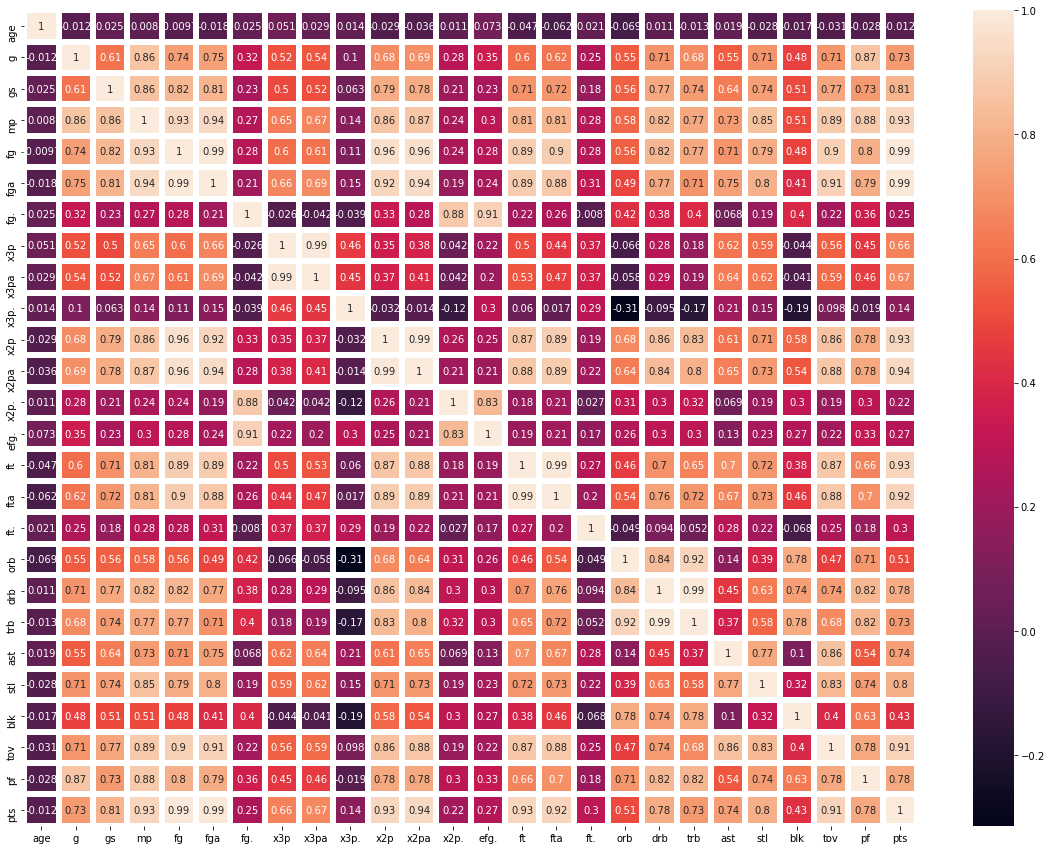

In [482]:
corr = nba.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr, annot=True, linewidths=5)

### Visualizing correlations

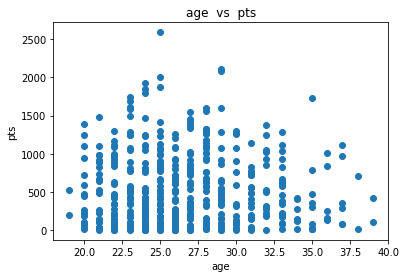

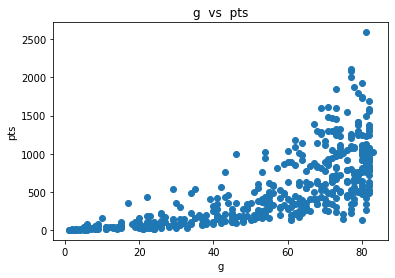

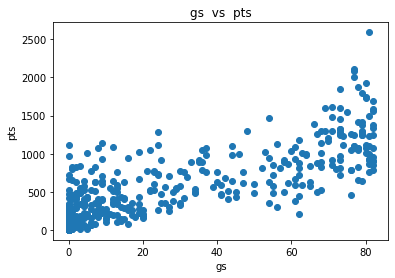

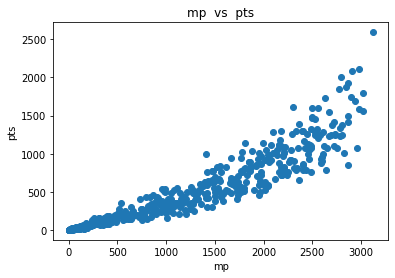

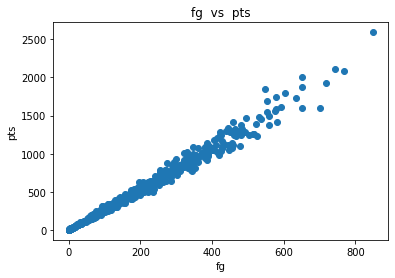

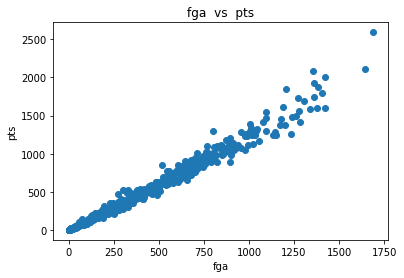

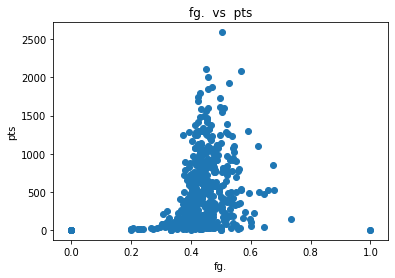

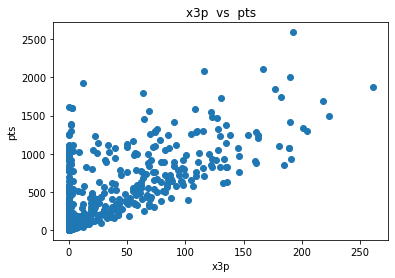

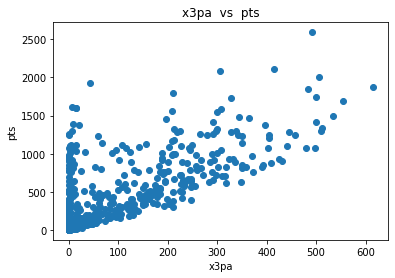

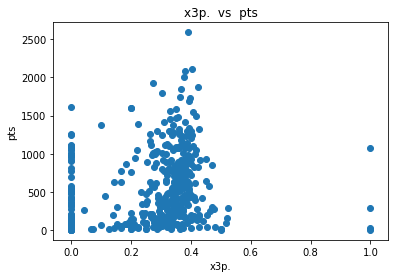

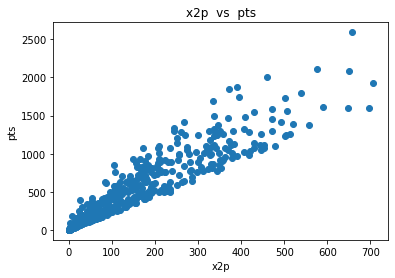

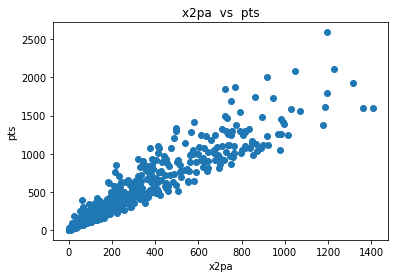

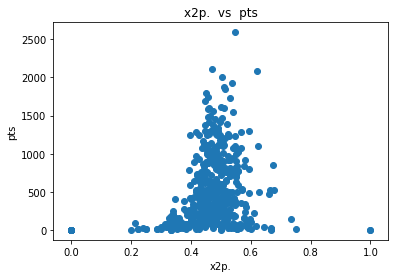

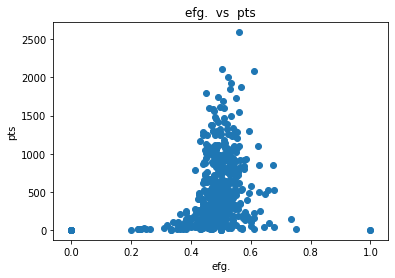

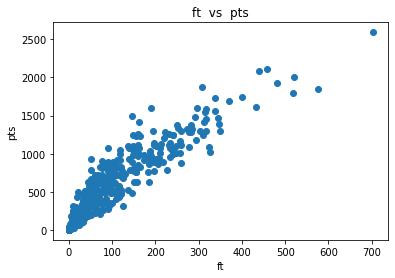

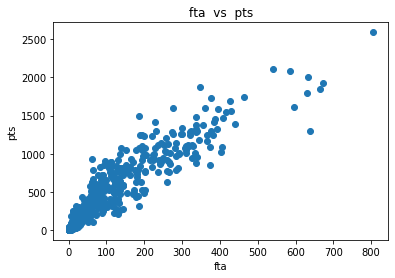

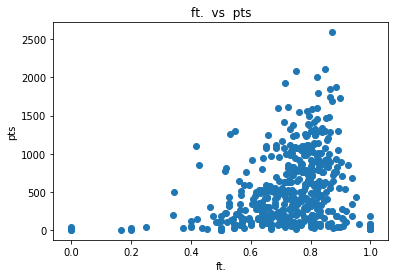

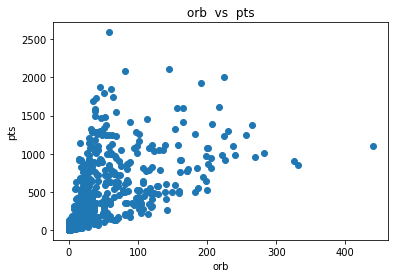

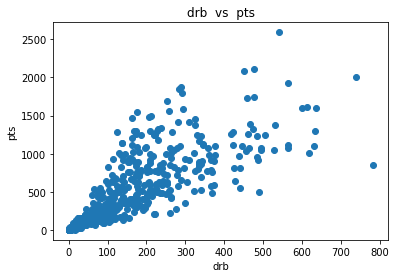

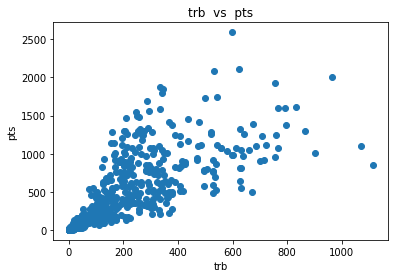

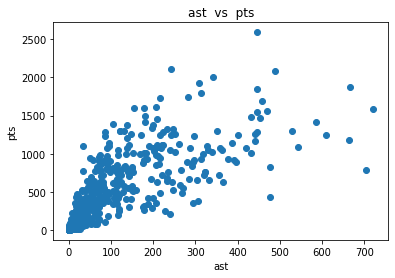

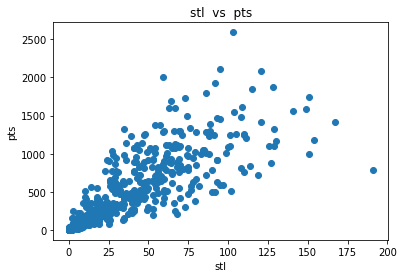

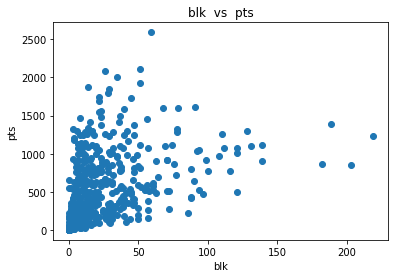

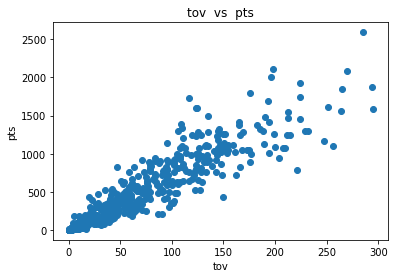

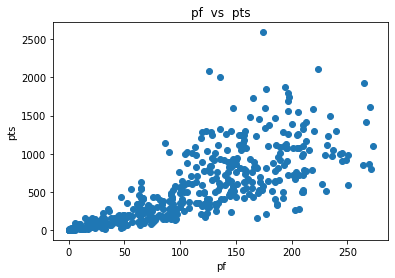

In [483]:
x_columns = ['age', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf']
y_columns = 'pts'

for x_col in x_columns:

    figure = plt.figure
    ax = plt.gca()
    ax.scatter(nba[x_col], nba[y_columns])
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_columns)
    ax.set_title("{}  vs  {}".format(x_col, y_columns))

    plt.show()

In [484]:
nba['pos'].value_counts()

SG    109
SF     99
PF     96
C      90
PG     85
G       1
F       1
Name: pos, dtype: int64

In [485]:
# # from scipy import stats
# # stats.f_oneway(nba['pts'][nba['pos'] == 'SG'],nba['pts'][nba['pos'] == 'SF'],nba['pts'][nba['pos'] == 'PF'],
#                nba['pts'][nba['pos'] == 'C'],nba['pts'][nba['pos'] == 'PG'],nba['pts'][nba['pos'] == 'F'],
#                nba['pts'][nba['pos'] == 'G'])



### Categorical - Continuous correlation

In [486]:
#One way ANOVA
#H0: pos & pts are independent.
#H1: pos & pts are dependent.
F, p = stats.f_oneway(nba[nba.pos=='SG'].pts,nba[nba.pos=='SF'].pts,nba[nba.pos=='PF'].pts,nba[nba.pos=='C'].pts,
                    nba[nba.pos=='PG'].pts,nba[nba.pos=='F'].pts,nba[nba.pos=='G'].pts)


#A p-value less than 0.05 (typically ≤ 0.05) is statistically significant.
#A p-value higher than 0.05 (> 0.05) is not statistically significant and indicates strong evidence for the null hypothesis.
#F value is inversely related to p value and higher F value (greater than F critical value) indicates a significant p value.
#The greater the F score value the higher the correlation will be.    
if p <= 0.05:
    print('Variables(pos & pts) are dependent (Reject H0)')
else:
    print('Variables(pos & pts) are Independent (Accept H0)')

Variables(pos & pts) are Independent (Accept H0)


### Removing variables which are less correlated & donot help in predicting pts

In [487]:
nba.drop(['pos','age', 'fg.', 'x3p.', 'x2p.', 'efg.', 'ft.', 'blk'], axis=1,inplace=True)

In [488]:
nba.shape

(481, 19)

# DATA CLEANING & TRANSFORMATION

### Splitting the data into train and test

In [489]:
x = nba.iloc[:,:-1]
y = nba.iloc[:,-1]

In [490]:
print('Features are of shape ', x.shape)
print('Label is of shape ', y.shape)

Features are of shape  (481, 18)
Label is of shape  (481,)


In [491]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [492]:
x_train

,g,gs,mp,fg,fga,x3p,x3pa,x2p,x2pa,ft,fta,orb,drb,trb,ast,stl,tov,pf
264,79,47,1973,295,614,72,194,223,420,99,112,29,158,187,115,65,73,127
235,40,0,789,85,214,43,127,42,87,37,43,31,66,97,31,27,22,63
200,70,23,1856,344,639,0,1,344,638,91,177,171,326,497,113,41,114,185
213,53,5,655,67,177,32,89,35,88,15,16,35,97,132,23,16,10,57
278,79,79,2862,457,1080,190,500,267,580,313,385,88,281,369,586,121,194,267
59,79,79,2531,492,953,74,218,418,735,223,272,98,424,522,87,80,125,192
298,77,70,2556,413,892,162,404,251,488,221,258,30,164,194,138,111,111,119
377,82,82,2638,255,670,44,133,211,537,227,283,61,281,342,704,191,221,218
450,73,73,2614,449,1143,109,327,340,816,282,337,39,267,306,447,86,169,128
379,65,13,1089,143,300,0,0,143,300,64,94,82,172,254,51,24,44,134


In [493]:
y_train

264     761
235     250
200     779
213     181
278    1417
59     1281
298    1209
377     781
450    1289
379     350
466     603
65      159
247     404
45      573
153     174
55      492
175     511
171    1068
464     404
198    1081
155     315
221    1047
451    1583
443     758
435     115
397       0
159    1041
157     248
49      497
303     200
52      763
74      878
26      240
276     908
4       328
282     791
5        92
233     270
135     145
408    1080
122    1011
22      401
68       83
20     1107
295      35
14      810
313     796
354      94
64      645
160    1457
326     548
81      470
345    1226
332    1735
154     910
453      48
439     200
460       0
353     646
480     399
293     280
272    1695
51      821
206      47
325     102
407       7
106     356
306     826
63        7
454     414
412    1012
424       6
249      37
89      846
366     532
93       68
315     636
300     990
271       2
92      257
18       28
145      19
158     859
150 

### Checking for missing values

In [494]:
x_train.isnull().sum()

g       0
gs      0
mp      0
fg      0
fga     0
x3p     0
x3pa    0
x2p     0
x2pa    0
ft      0
fta     0
orb     0
drb     0
trb     0
ast     0
stl     0
tov     0
pf      0
dtype: int64

In [495]:
y_train.isnull().sum()

0

### Checking for outliers in x_train

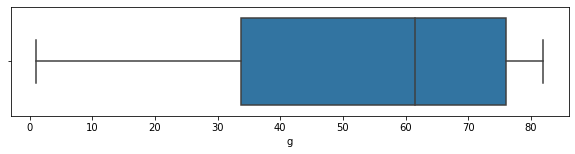

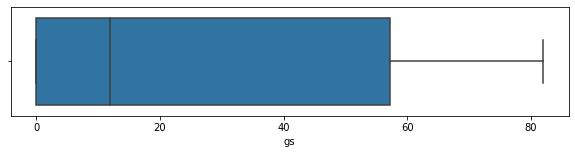

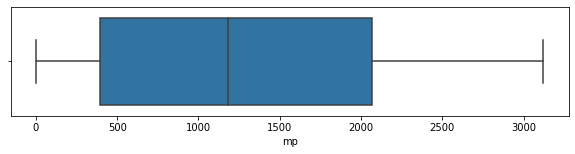

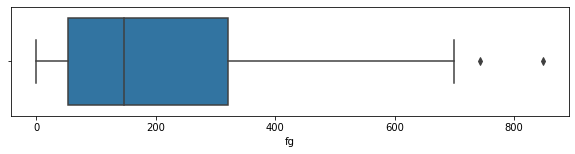

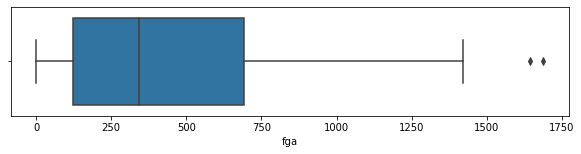

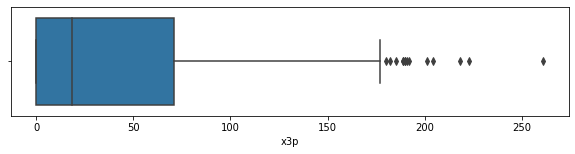

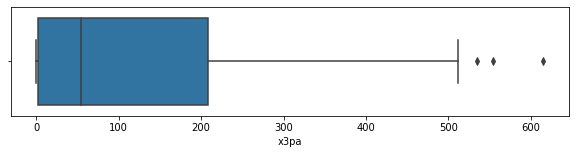

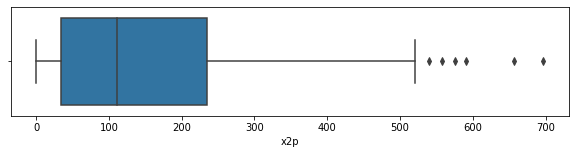

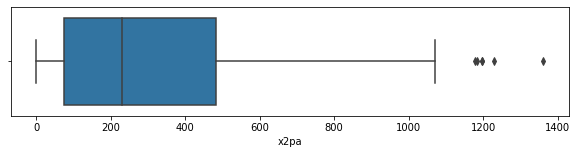

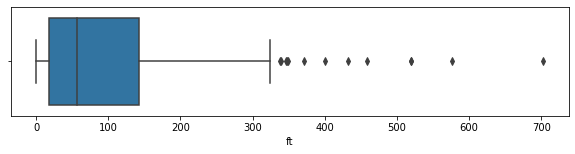

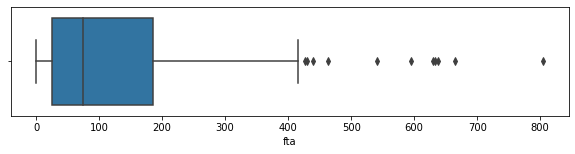

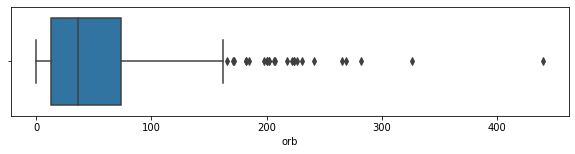

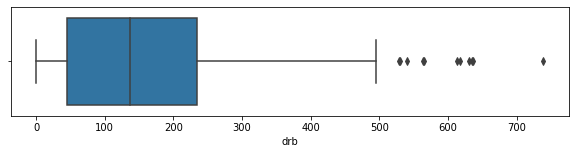

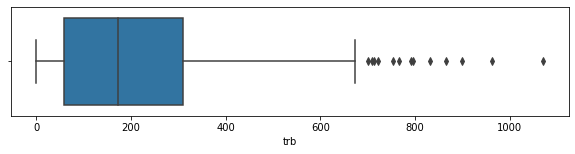

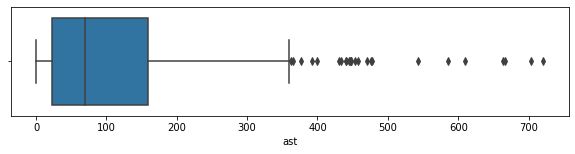

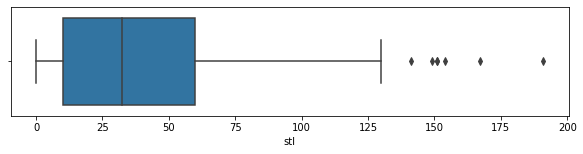

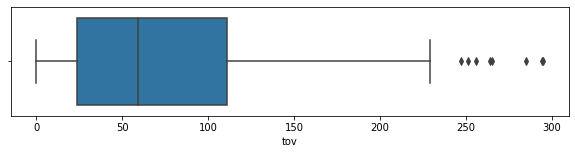

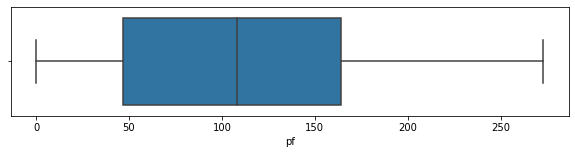

In [496]:
columns = ['g', 'gs', 'mp', 'fg', 'fga', 'x3p', 'x3pa', 'x2p', 'x2pa', 'ft',
        'fta', 'orb', 'drb', 'trb', 'ast', 'stl', 'tov', 'pf']
for col in columns:
    plt.figure(figsize=(10,2))
    sns.boxplot(x_train[col])

### Checking for outliers in y_train

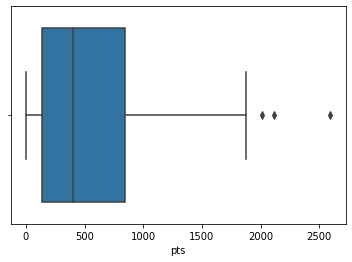

In [497]:
sns.boxplot(y_train)

### Treating outliers in x_train

In [498]:
# columns = ['g', 'gs', 'mp', 'fg', 'fga', 'x3p', 'x3pa', 'x2p', 'x2pa', 'ft',
#        'fta', 'orb', 'drb', 'trb', 'ast', 'stl', 'tov', 'pf']

def iqr_capping(df,cols,factor):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3-q1
        upper_whisker = q3+(factor*iqr)
        lower_whisker = q1-(factor*iqr)
        df[col]=np.where(df[col]>upper_whisker,upper_whisker,np.where(df[col]<lower_whisker,lower_whisker,df[col]))

In [499]:
xtrain_cap=x_train.copy()
iqr_capping(xtrain_cap,columns,1.5)

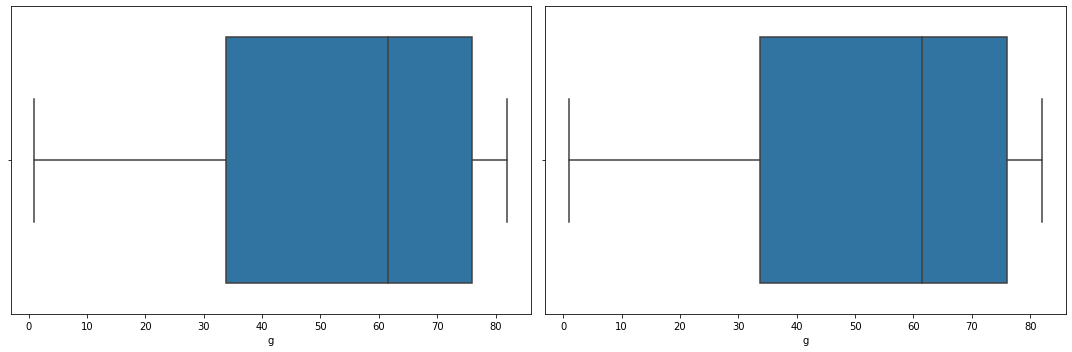

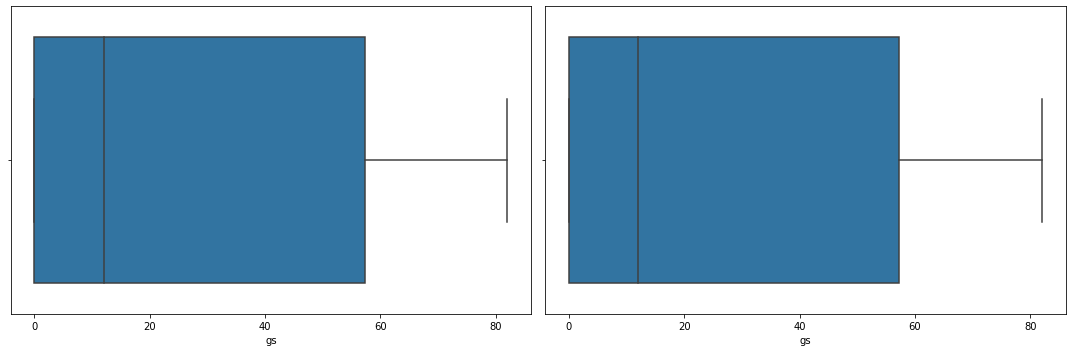

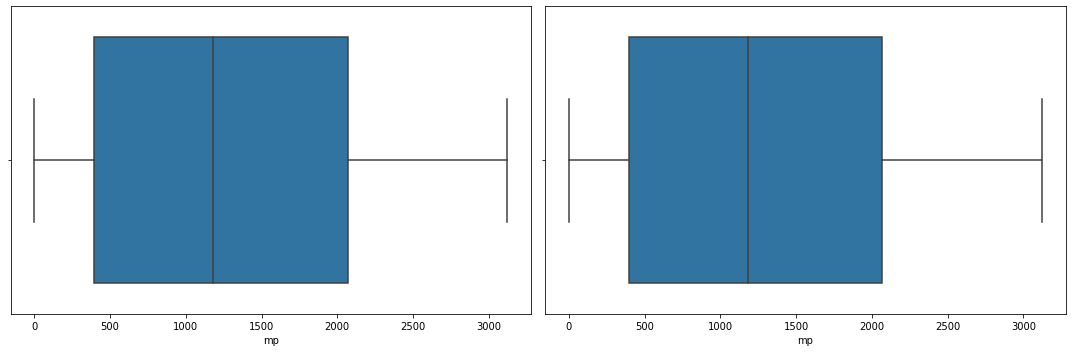

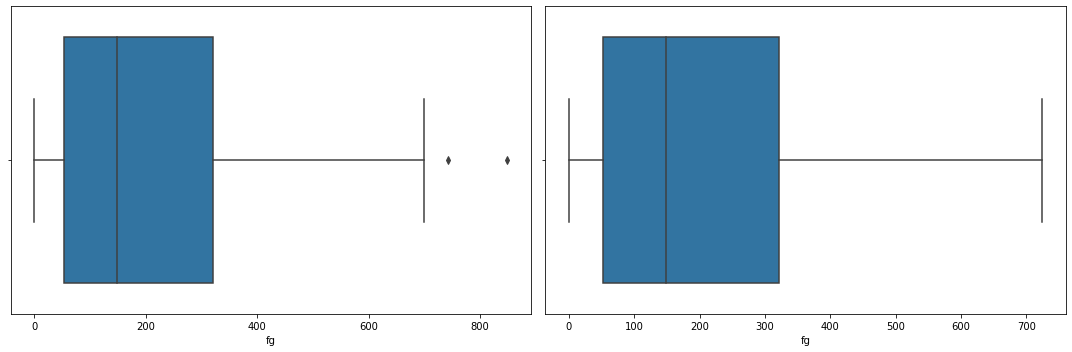

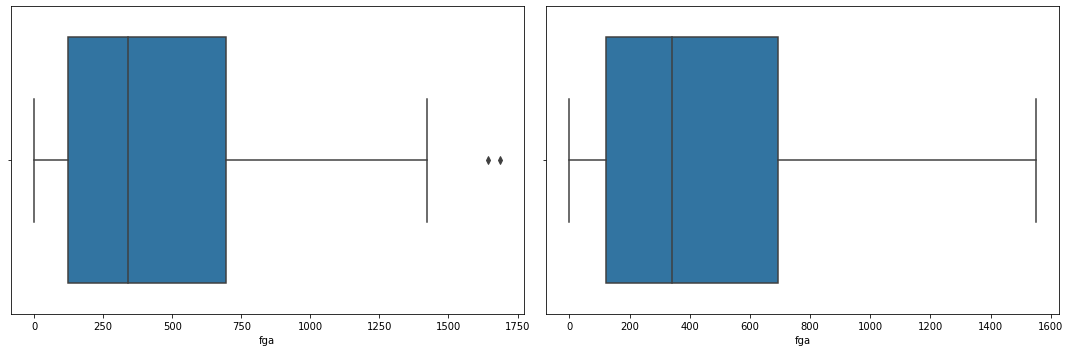

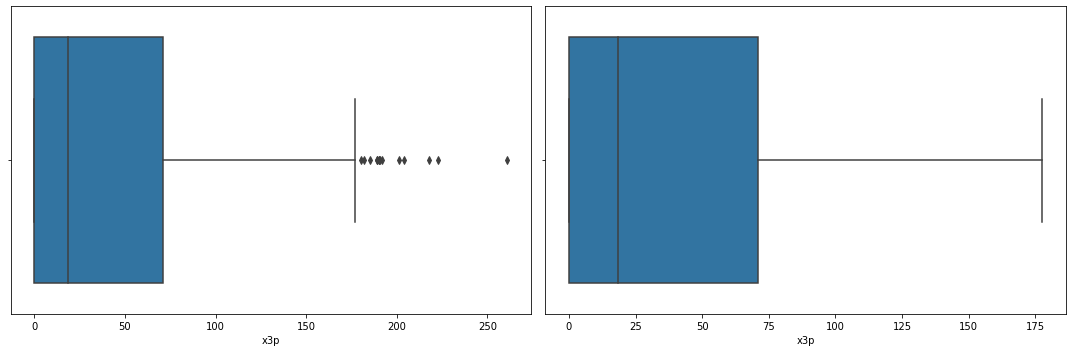

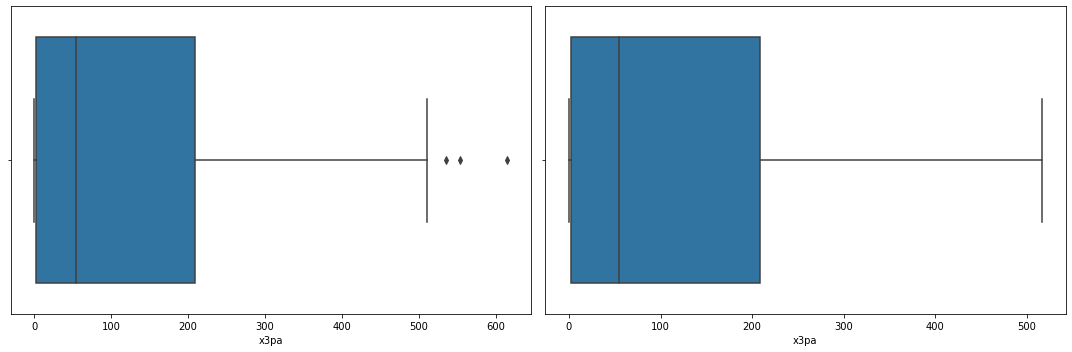

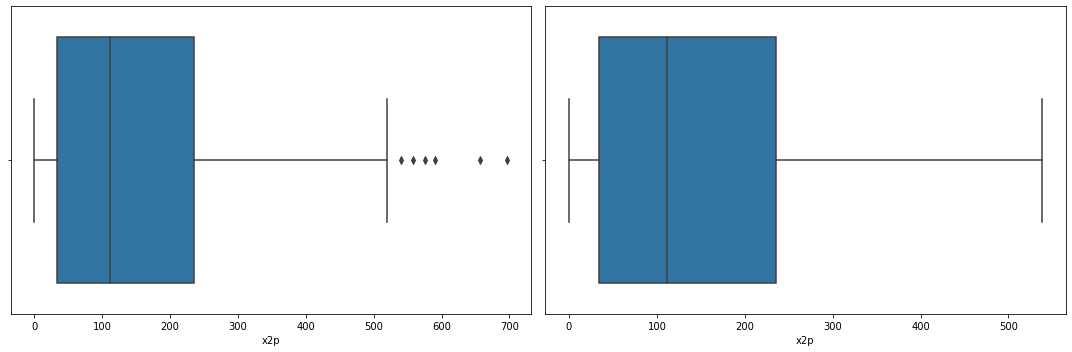

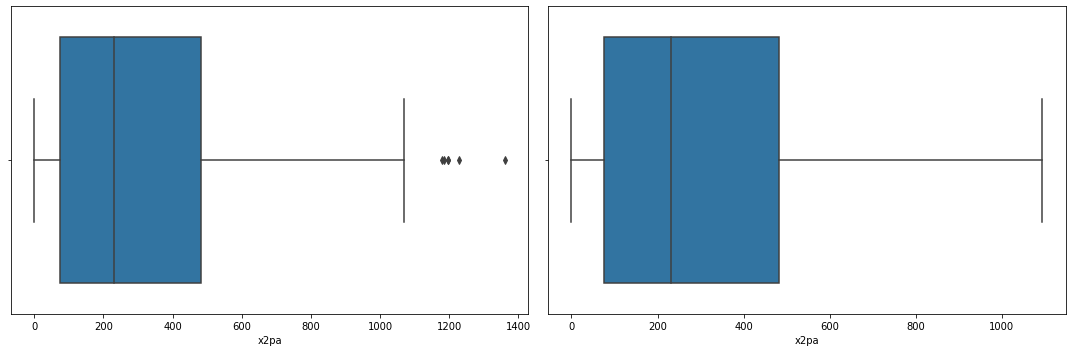

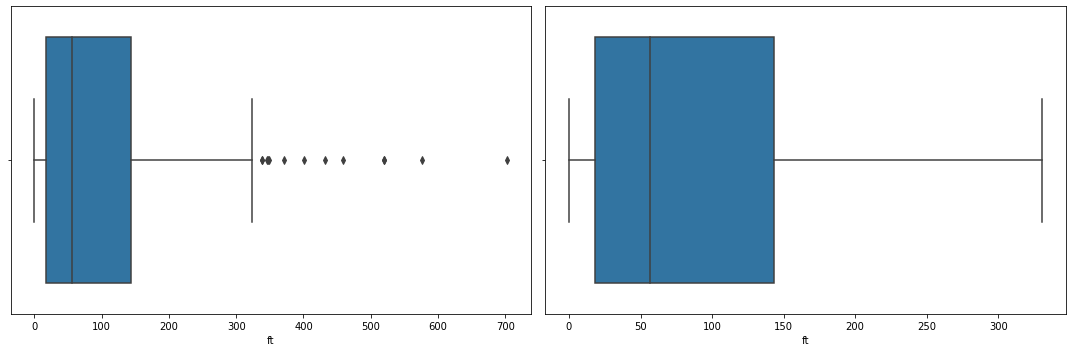

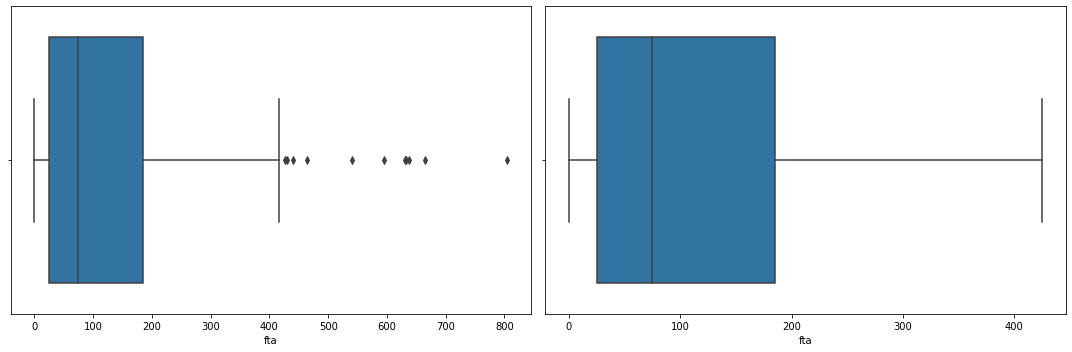

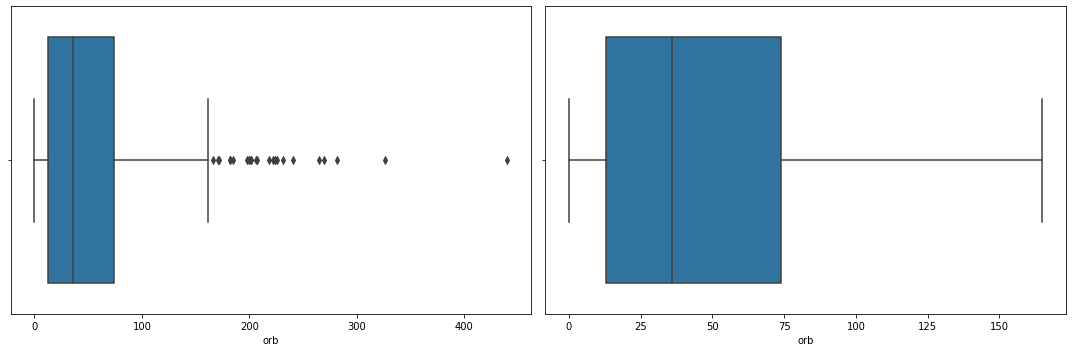

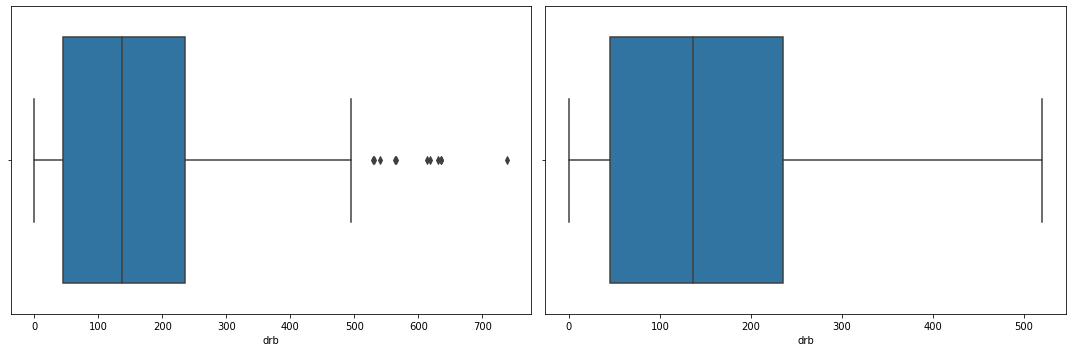

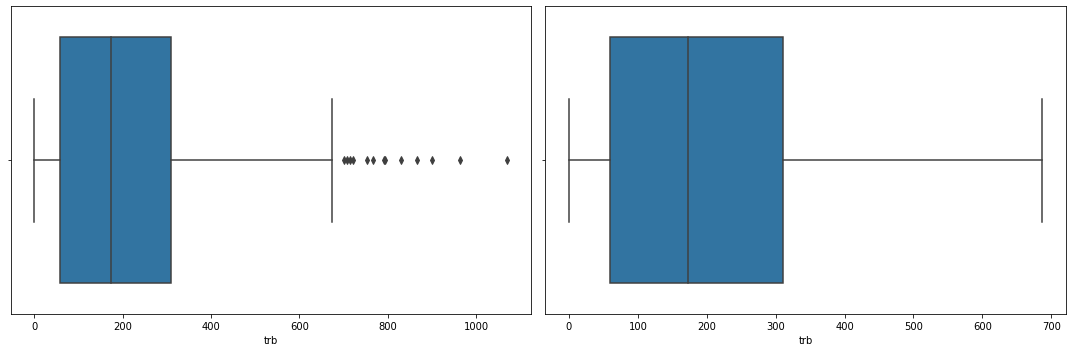

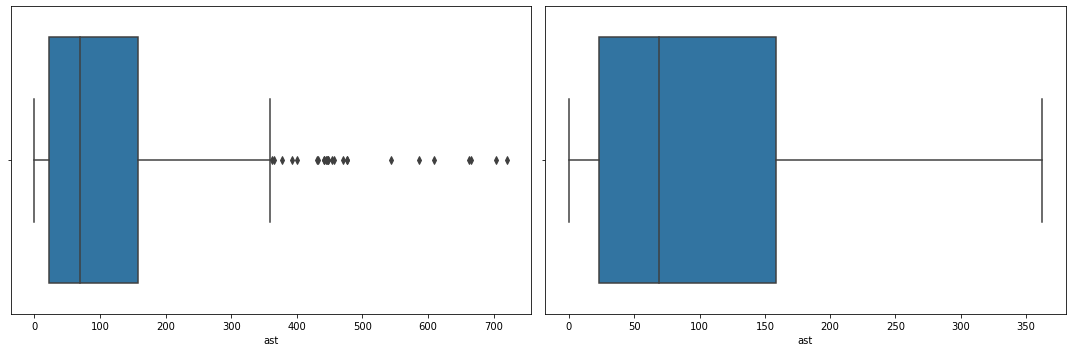

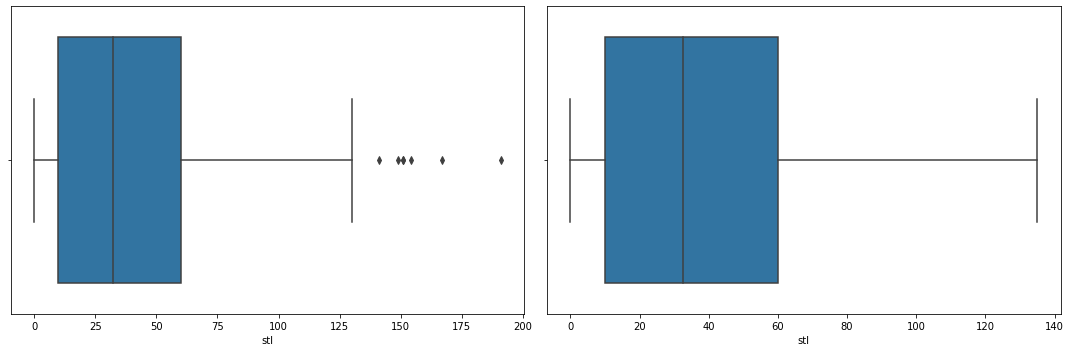

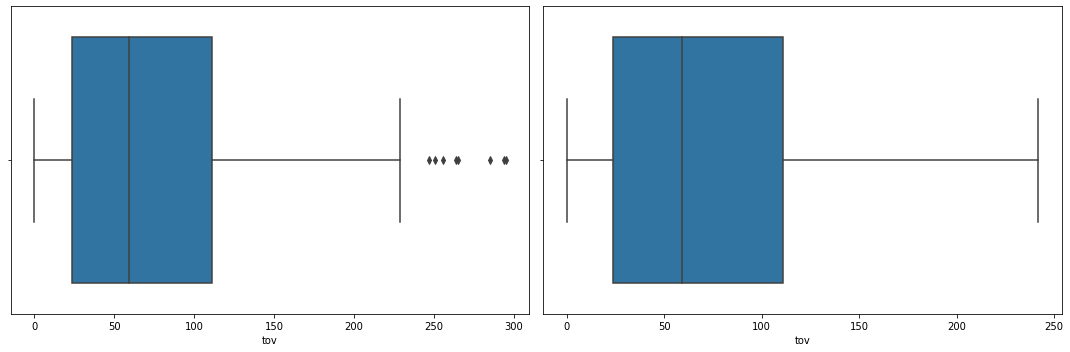

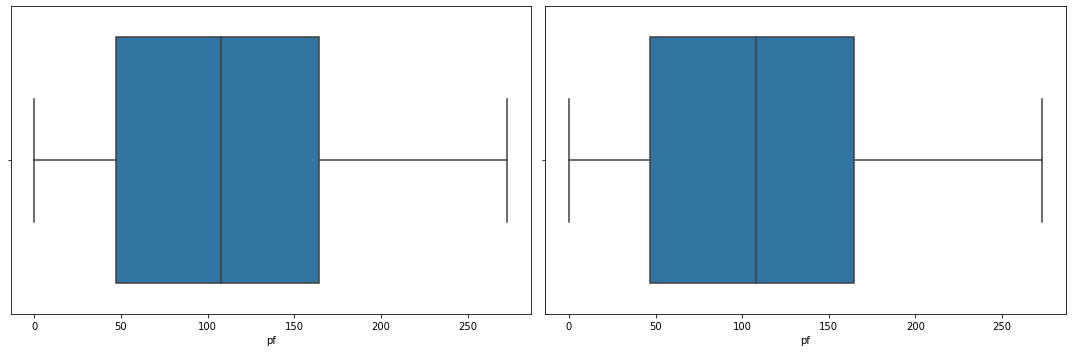

In [500]:
for col in columns:
    plt.figure(figsize=(15,5))
    
    plt.subplot(121)
    sns.boxplot(x_train[col])
    
    plt.subplot(122)
    sns.boxplot(train_cap[col])
    
    plt.tight_layout()
    plt.show()

### Treating outliers in y_train

In [501]:
ytrain_cap = y_train.copy()
q1 = ytrain_cap.quantile(0.25)
q3 = ytrain_cap.quantile(0.75)
iqr = q3-q1
upper_whisker = q3+(1.5*iqr)
lower_whisker = q1-(1.5*iqr)
ytrain_cap = np.where(ytrain_cap>upper_whisker,upper_whisker,np.where(ytrain_cap<lower_whisker,lower_whisker,ytrain_cap))

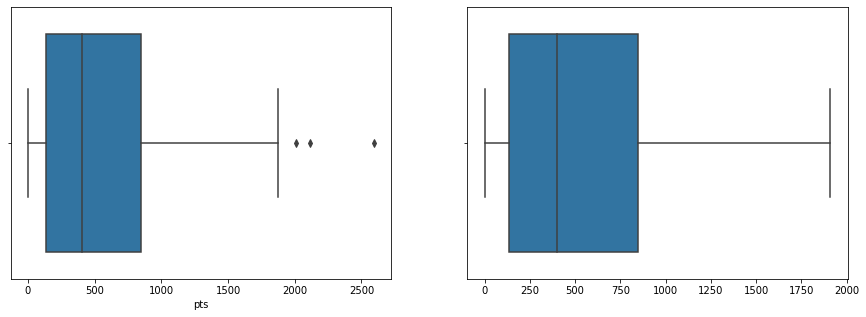

In [502]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(y_train)
    
plt.subplot(122)
sns.boxplot(ytrain_cap)

### Checking for skewness

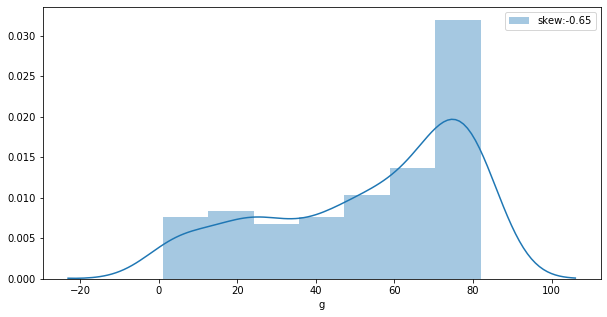

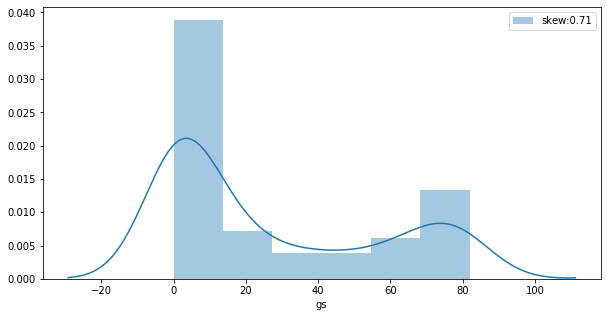

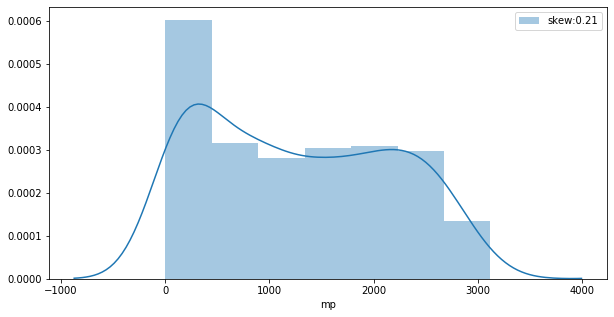

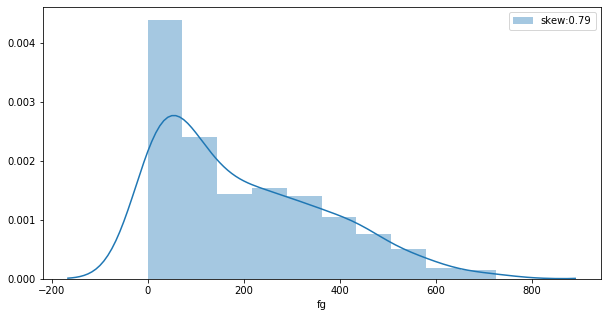

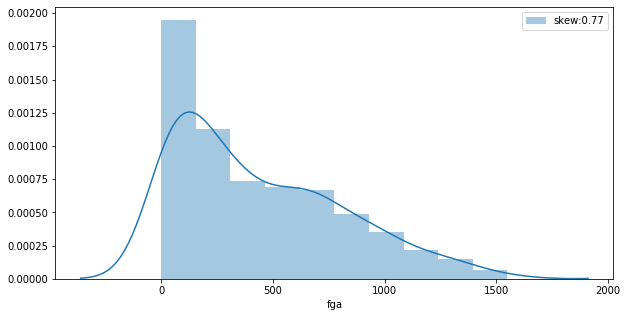

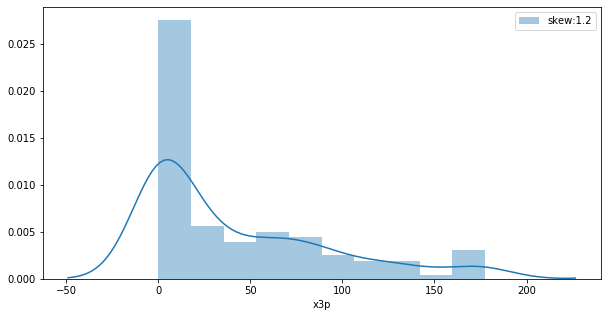

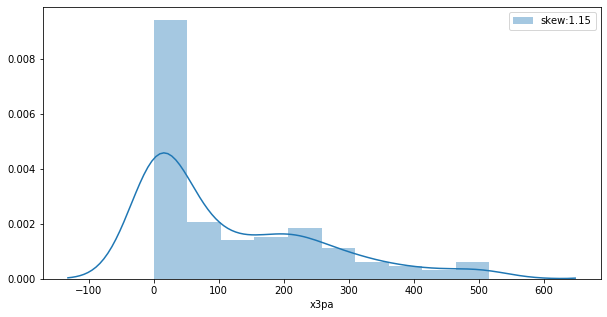

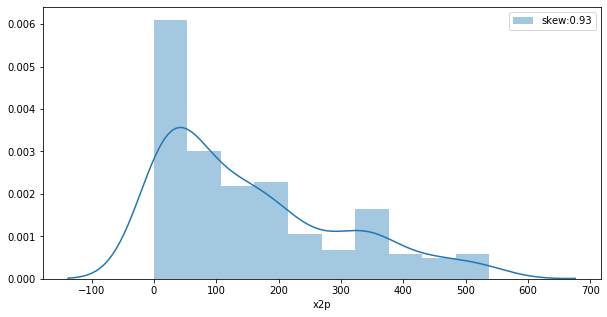

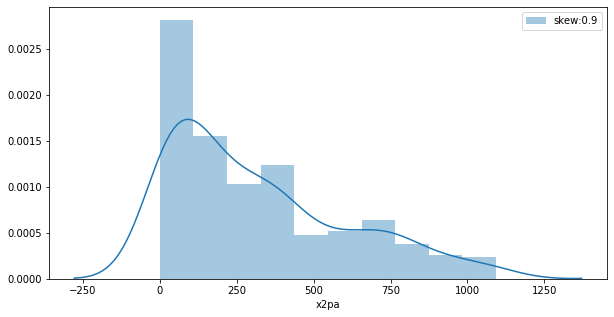

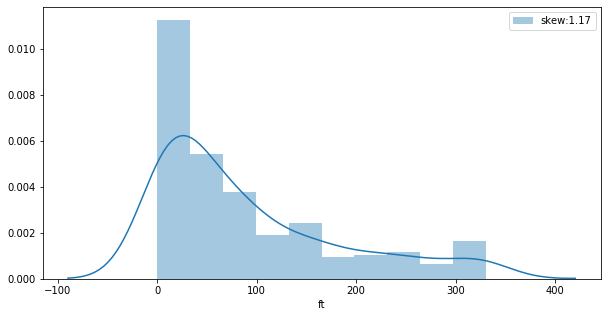

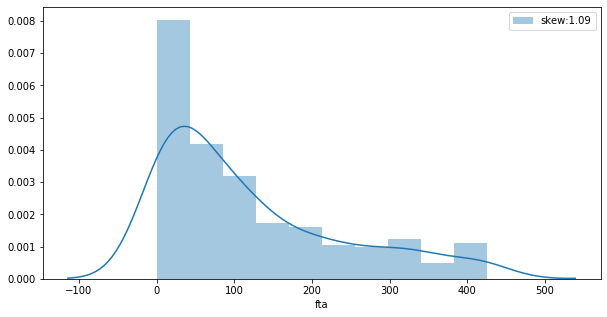

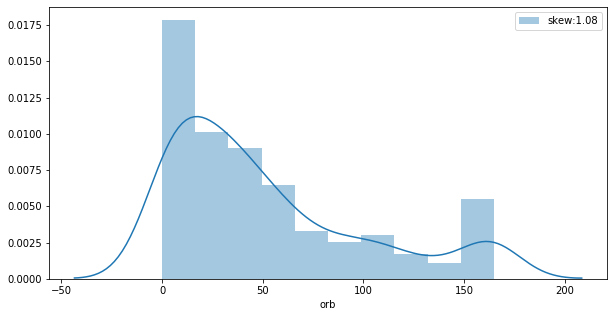

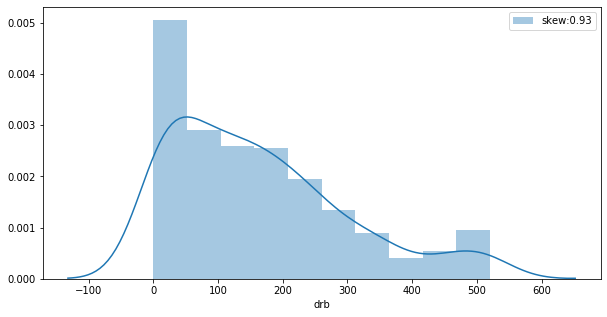

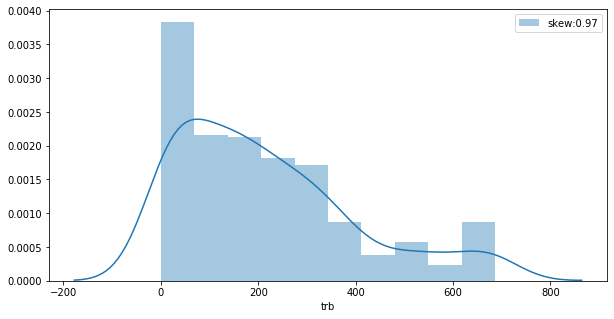

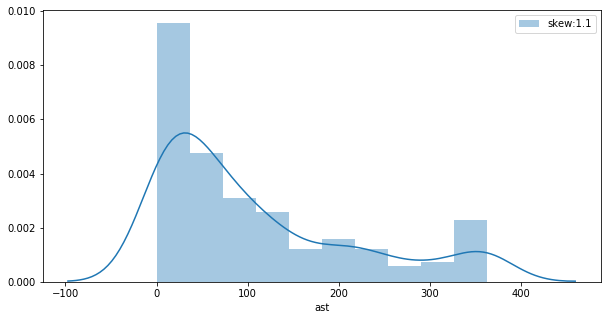

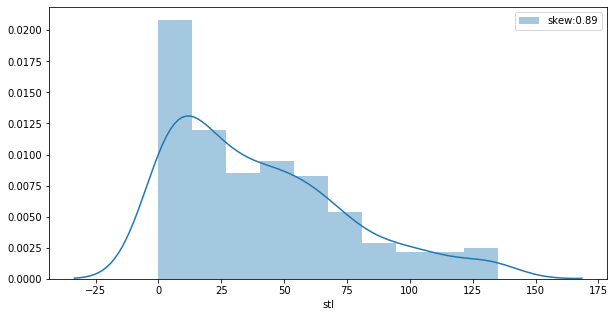

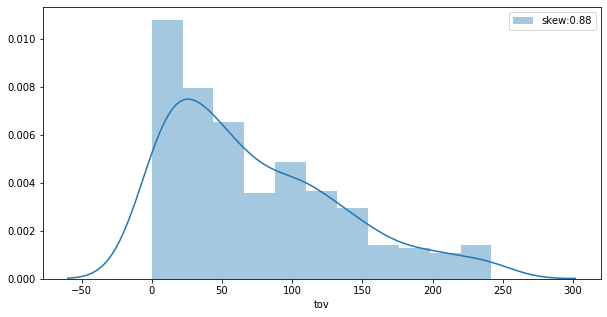

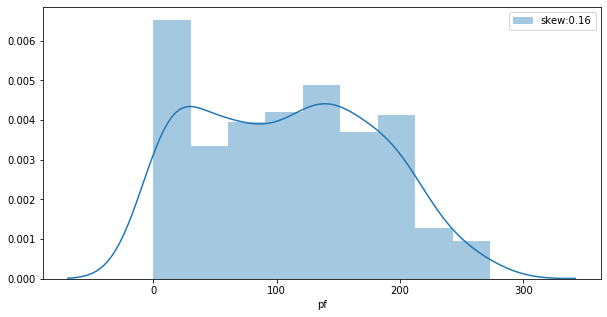

In [503]:
for col in columns:
    plt.figure(figsize=(10,5))
    sns.distplot(xtrain_cap[col],label='skew:'+str(np.round(xtrain_cap[col].skew(),2)))
    plt.legend()

In [504]:
xtrain_cap.shape

(384, 18)

### Applying power transformation

In [505]:
pt = PowerTransformer(method='yeo-johnson')
data = xtrain_cap.iloc[:,:].values
data = pt.fit_transform(data)
xtrain_cap_pt = pd.DataFrame(data)


In [506]:
xtrain_cap_pt

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.056422,0.925735,0.812971,0.738323,0.667158,0.930701,0.879668,0.710160,0.609769,0.482954,0.326152,-0.147225,0.252207,0.140436,0.447458,0.838253,0.272037,0.378276
1,-0.621985,-1.308437,-0.313108,-0.410796,-0.340038,0.624306,0.613431,-0.653484,-0.682537,-0.275097,-0.403043,-0.093659,-0.528012,-0.438070,-0.528372,-0.098311,-0.754792,-0.484692
2,0.649833,0.464756,0.719871,0.920923,0.713866,-1.286211,-1.261088,1.204831,1.087561,0.409878,0.753227,1.673797,1.138243,1.326672,0.431938,0.308120,0.794065,1.018805
3,-0.088486,-0.373103,-0.482781,-0.575702,-0.481974,0.456089,0.403674,-0.761349,-0.675464,-0.809074,-0.965544,0.006727,-0.216863,-0.184866,-0.704453,-0.522408,-1.204048,-0.580297
4,1.056422,1.284885,1.448550,1.287191,1.399263,1.505733,1.543676,0.907191,0.972546,1.663232,1.619869,0.904237,0.935407,0.916779,1.639359,1.714925,1.545892,1.802730
5,1.056422,1.284885,1.224686,1.388848,1.223187,0.947440,0.956193,1.451031,1.265425,1.277702,1.208557,1.026189,1.527447,1.398861,0.209202,1.108881,0.913588,1.090407
6,0.965212,1.199450,1.242063,1.152192,1.133433,1.445261,1.385374,0.838265,0.773449,1.267918,1.149494,-0.120135,0.291898,0.177394,0.613186,1.580768,0.760245,0.281684
7,1.194121,1.311429,1.298499,0.574562,0.770243,0.637623,0.641565,0.651932,0.882293,1.297078,1.253457,0.517263,0.935407,0.819520,1.639359,1.891503,1.754724,1.347903
8,0.784245,1.228969,1.282069,1.263274,1.481874,1.188876,1.233528,1.190544,1.402445,1.540961,1.457399,0.099481,0.868314,0.682205,1.639359,1.208186,1.335848,0.390182
9,0.428428,0.126172,0.022828,0.005594,-0.060366,-1.286211,-1.471790,0.270946,0.271969,0.121873,0.177015,0.826325,0.343475,0.465085,-0.198987,-0.201535,-0.221065,0.460873


In [507]:
xtrain_cap_pt.columns = ['g', 'gs', 'mp', 'fg', 'fga', 'x3p', 'x3pa', 'x2p', 'x2pa', 'ft',
       'fta', 'orb', 'drb', 'trb', 'ast', 'stl', 'tov', 'pf']

In [508]:
xtrain_cap_pt

,g,gs,mp,fg,fga,x3p,x3pa,x2p,x2pa,ft,fta,orb,drb,trb,ast,stl,tov,pf
0,1.056422,0.925735,0.812971,0.738323,0.667158,0.930701,0.879668,0.710160,0.609769,0.482954,0.326152,-0.147225,0.252207,0.140436,0.447458,0.838253,0.272037,0.378276
1,-0.621985,-1.308437,-0.313108,-0.410796,-0.340038,0.624306,0.613431,-0.653484,-0.682537,-0.275097,-0.403043,-0.093659,-0.528012,-0.438070,-0.528372,-0.098311,-0.754792,-0.484692
2,0.649833,0.464756,0.719871,0.920923,0.713866,-1.286211,-1.261088,1.204831,1.087561,0.409878,0.753227,1.673797,1.138243,1.326672,0.431938,0.308120,0.794065,1.018805
3,-0.088486,-0.373103,-0.482781,-0.575702,-0.481974,0.456089,0.403674,-0.761349,-0.675464,-0.809074,-0.965544,0.006727,-0.216863,-0.184866,-0.704453,-0.522408,-1.204048,-0.580297
4,1.056422,1.284885,1.448550,1.287191,1.399263,1.505733,1.543676,0.907191,0.972546,1.663232,1.619869,0.904237,0.935407,0.916779,1.639359,1.714925,1.545892,1.802730
5,1.056422,1.284885,1.224686,1.388848,1.223187,0.947440,0.956193,1.451031,1.265425,1.277702,1.208557,1.026189,1.527447,1.398861,0.209202,1.108881,0.913588,1.090407
6,0.965212,1.199450,1.242063,1.152192,1.133433,1.445261,1.385374,0.838265,0.773449,1.267918,1.149494,-0.120135,0.291898,0.177394,0.613186,1.580768,0.760245,0.281684
7,1.194121,1.311429,1.298499,0.574562,0.770243,0.637623,0.641565,0.651932,0.882293,1.297078,1.253457,0.517263,0.935407,0.819520,1.639359,1.891503,1.754724,1.347903
8,0.784245,1.228969,1.282069,1.263274,1.481874,1.188876,1.233528,1.190544,1.402445,1.540961,1.457399,0.099481,0.868314,0.682205,1.639359,1.208186,1.335848,0.390182
9,0.428428,0.126172,0.022828,0.005594,-0.060366,-1.286211,-1.471790,0.270946,0.271969,0.121873,0.177015,0.826325,0.343475,0.465085,-0.198987,-0.201535,-0.221065,0.460873


### Visualizing transformations

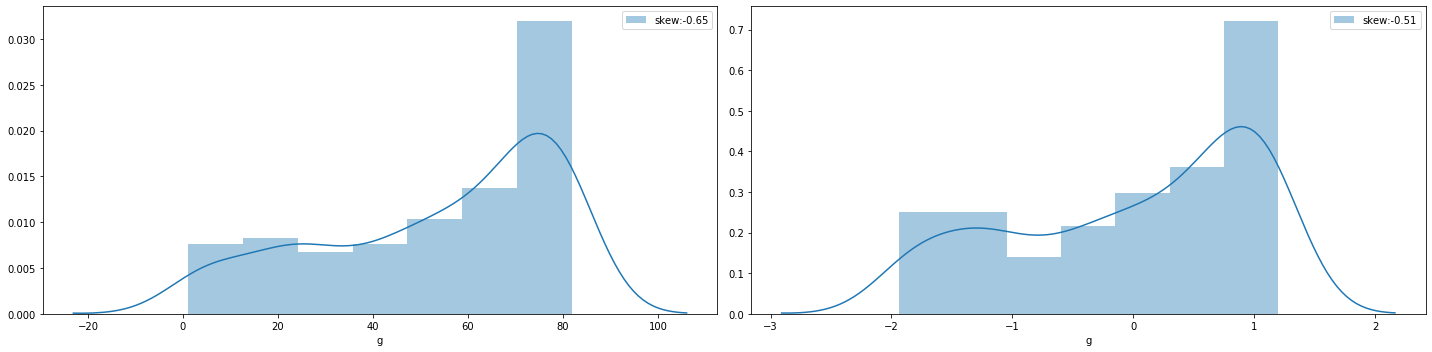

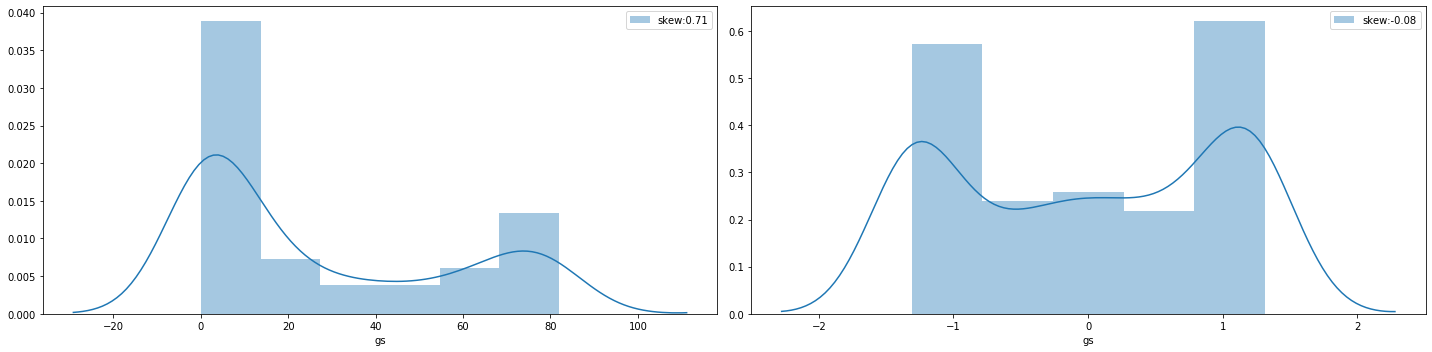

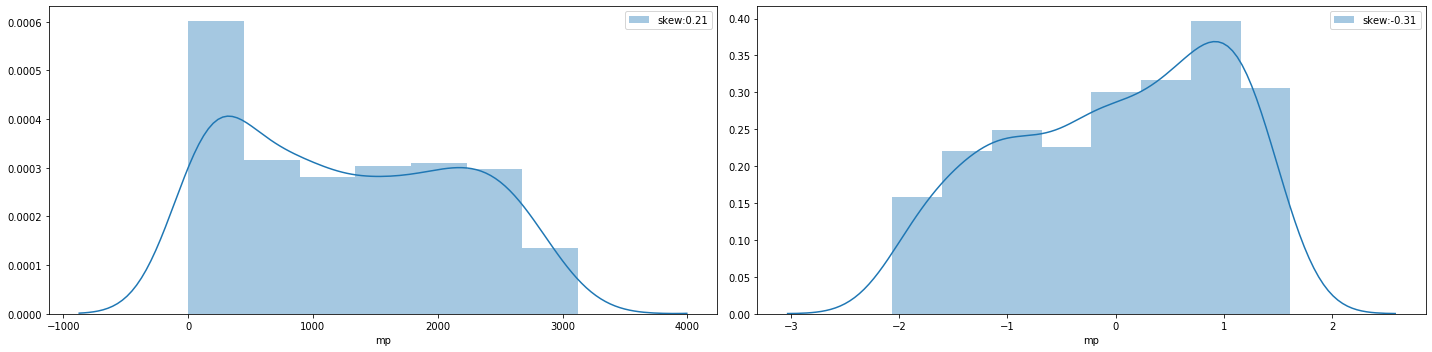

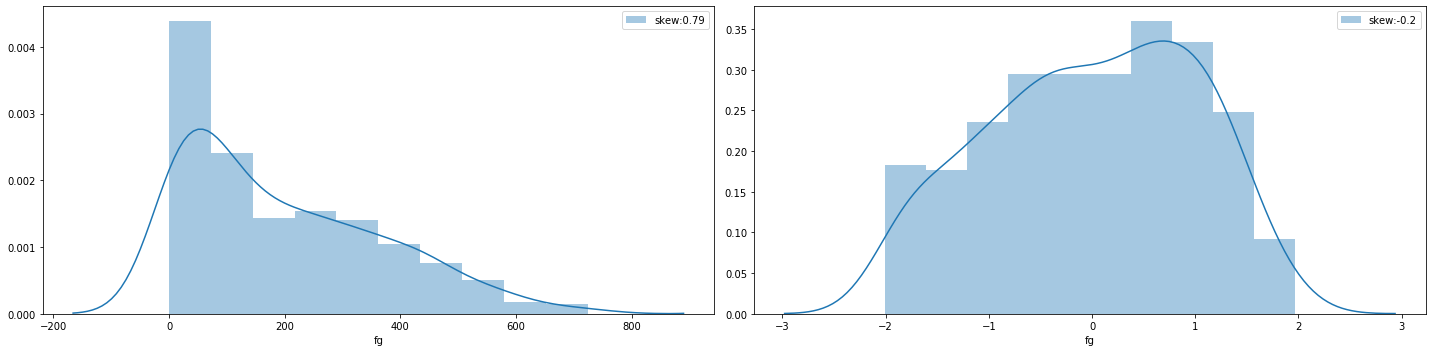

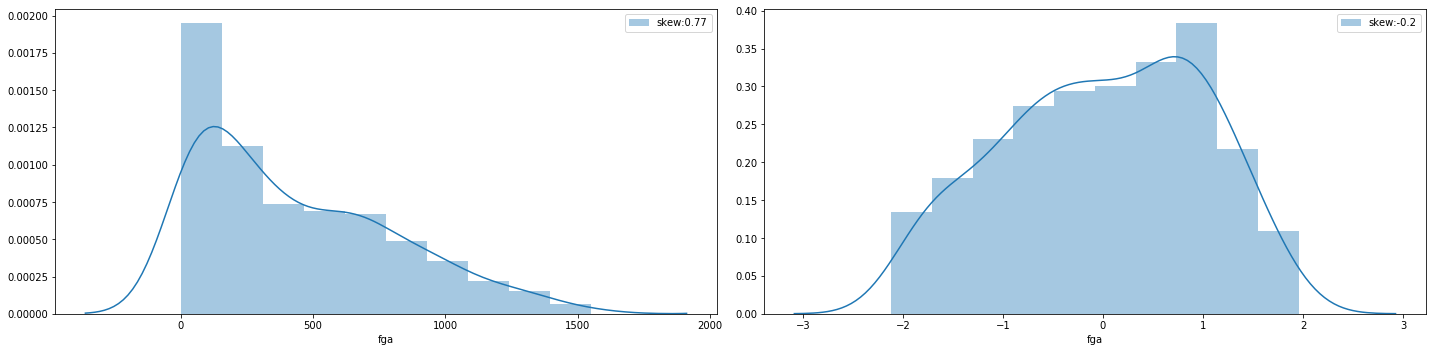

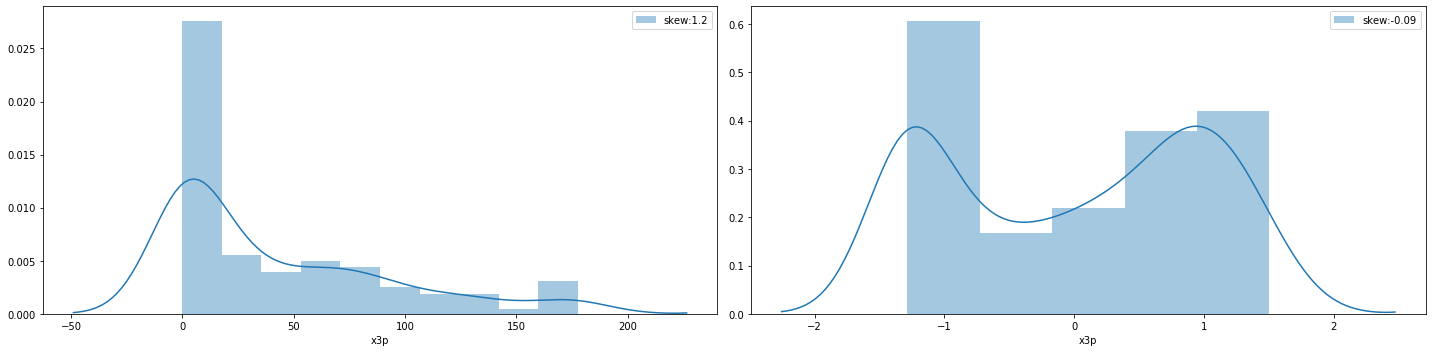

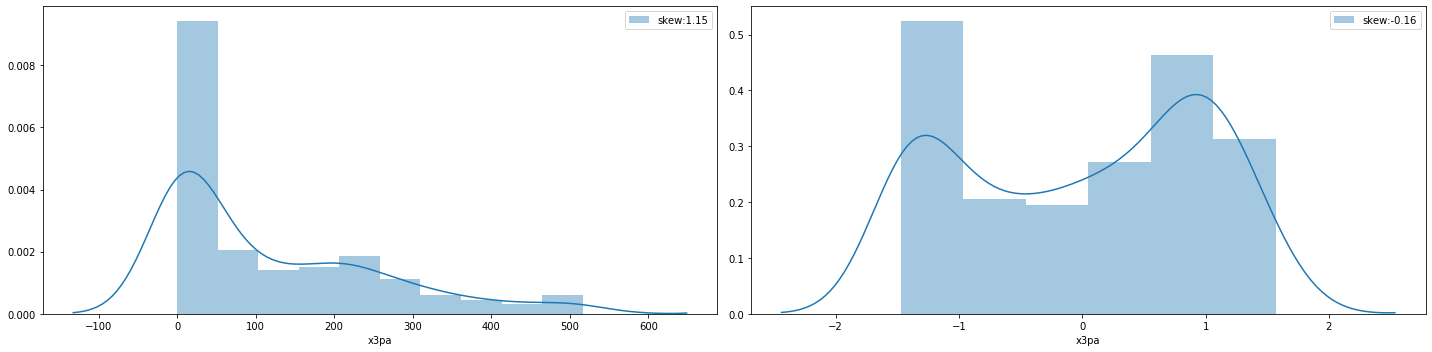

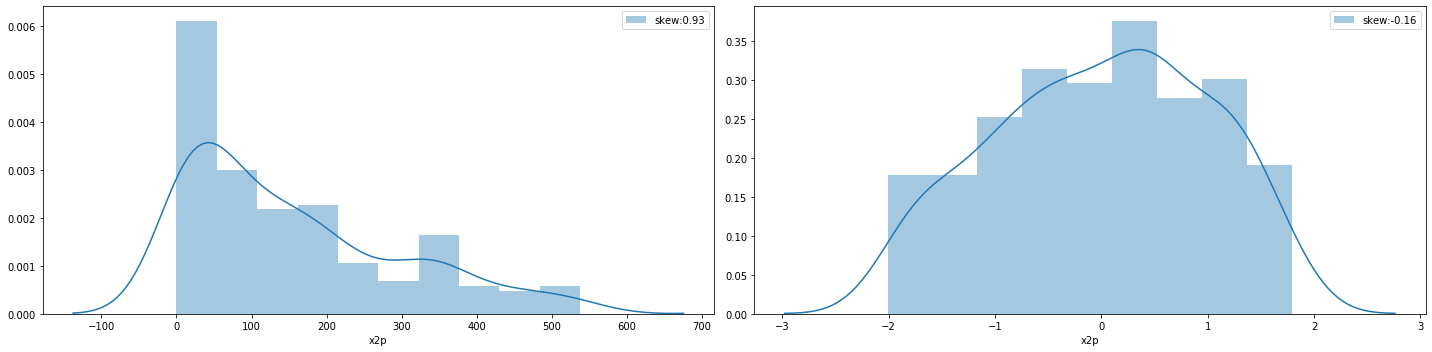

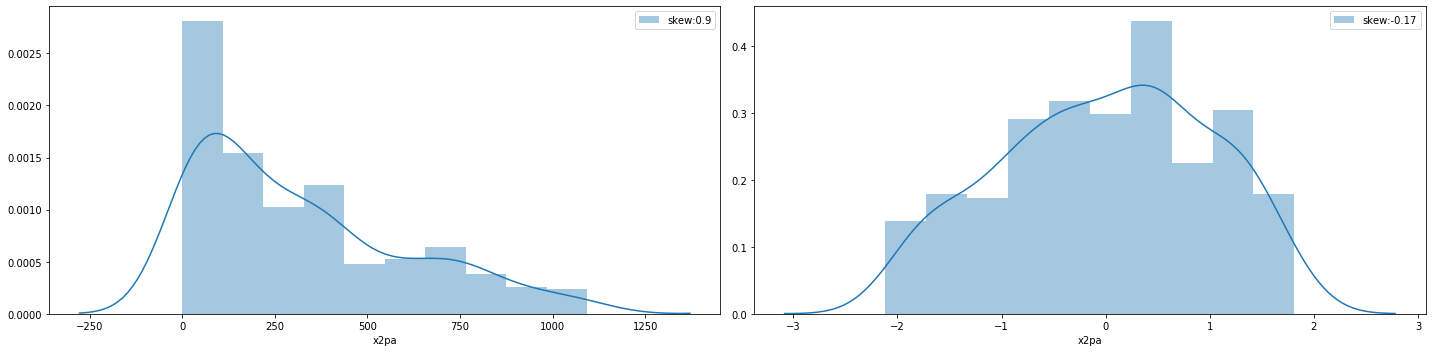

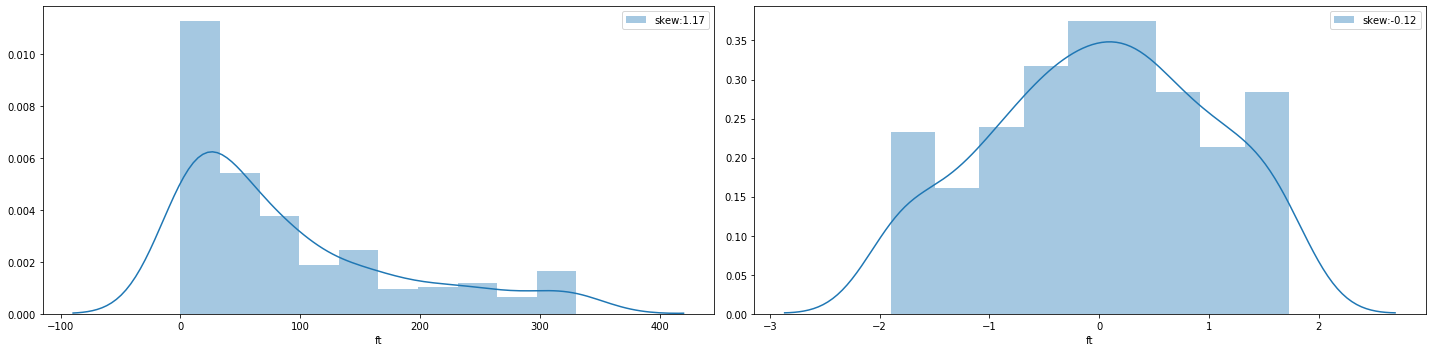

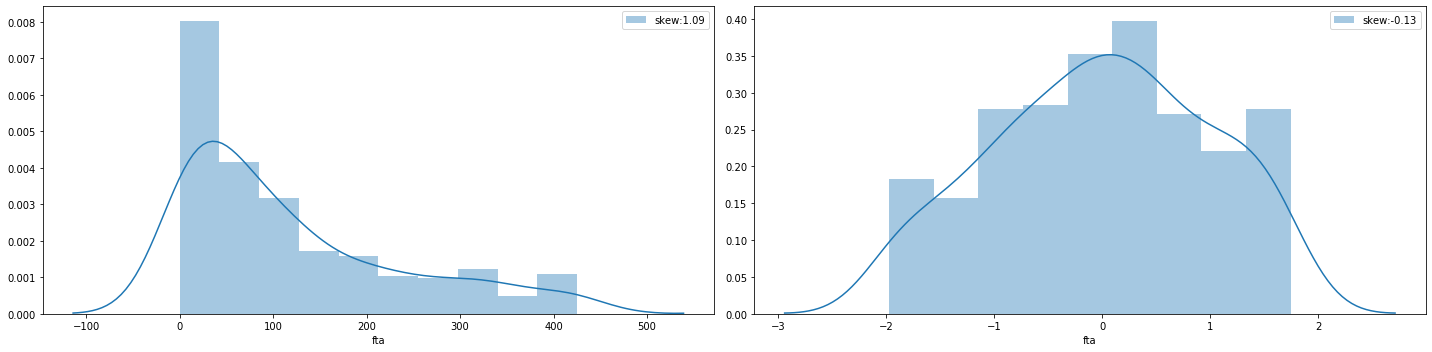

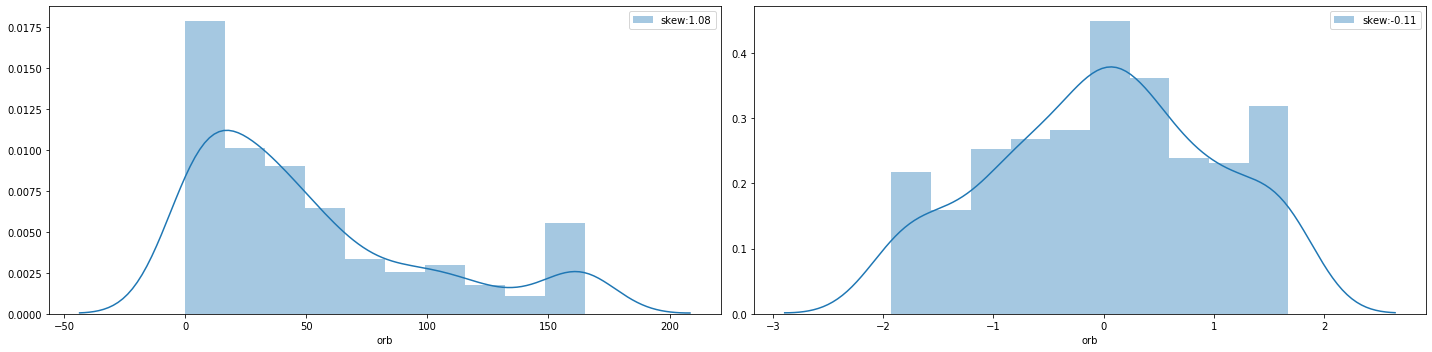

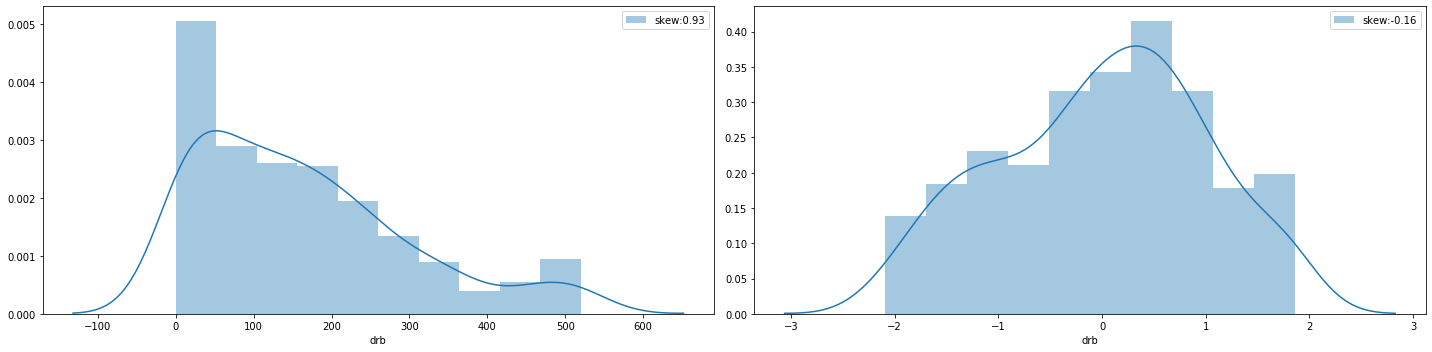

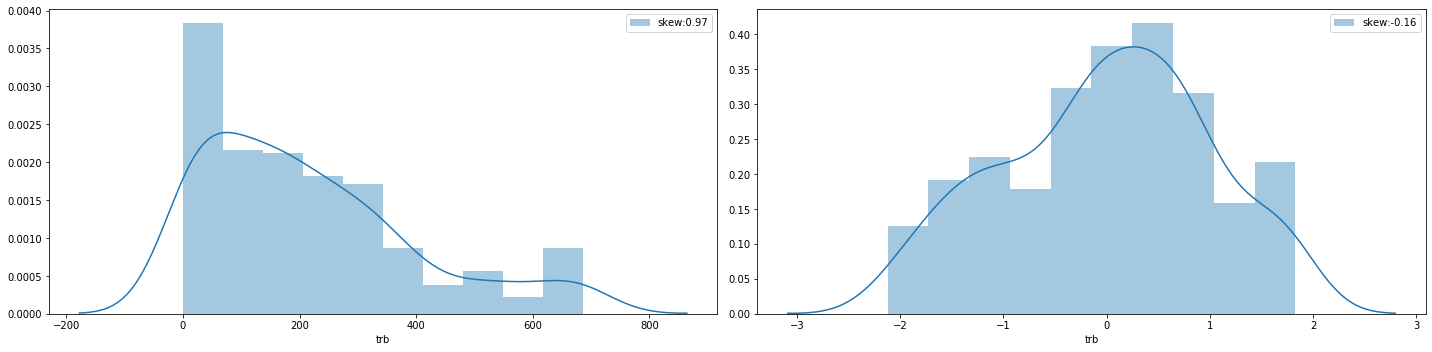

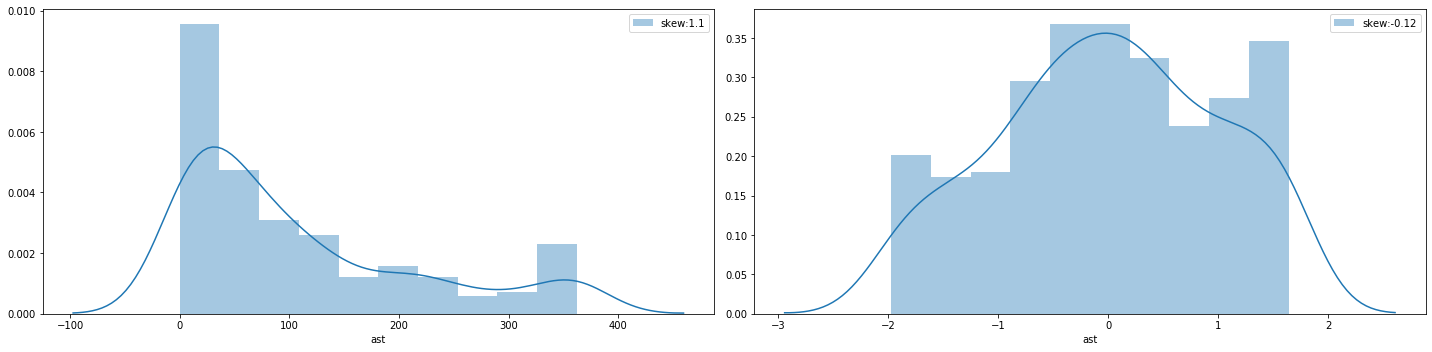

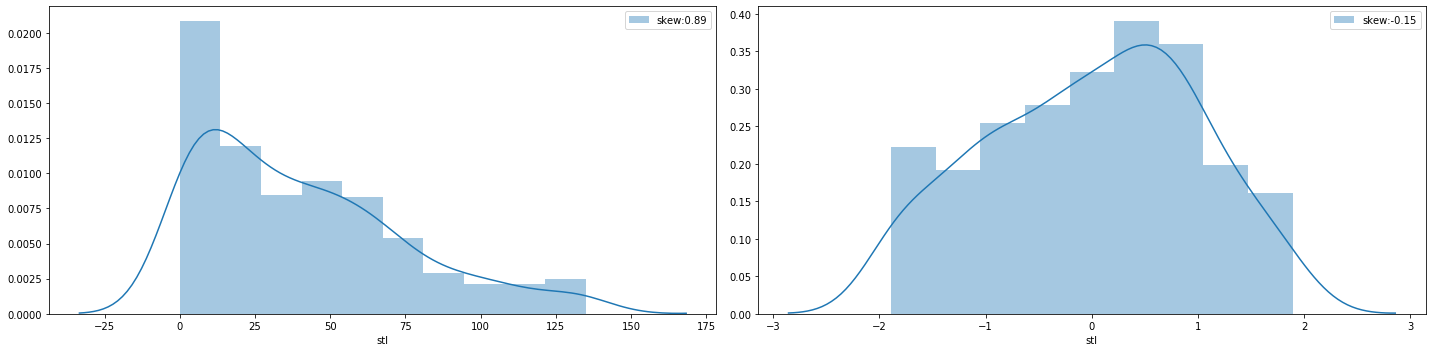

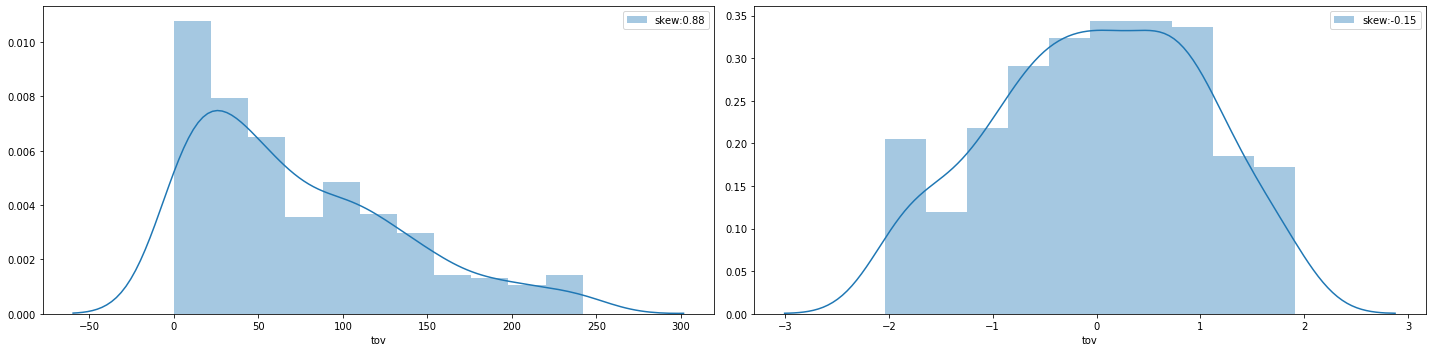

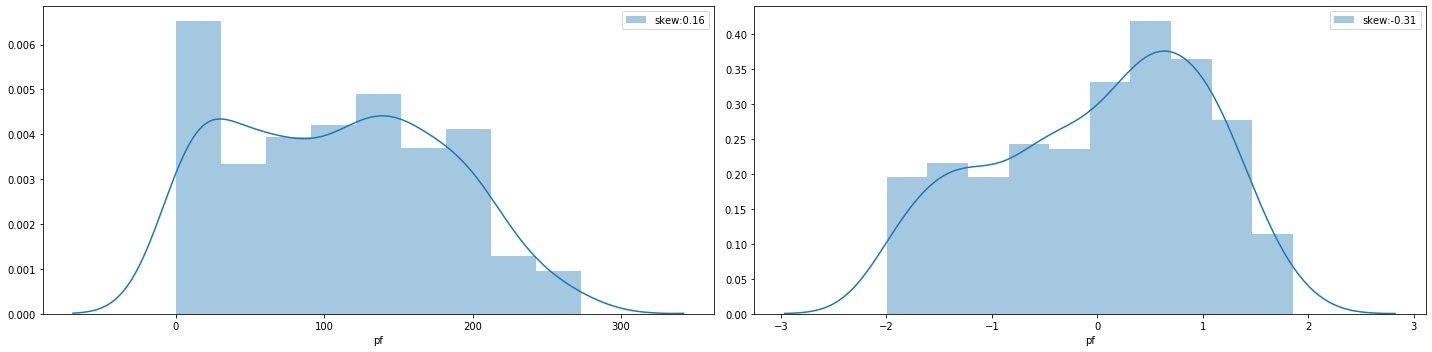

In [509]:
for col in columns:
    plt.figure(figsize=(20,5))
    
    plt.subplot(121)
    sns.distplot(xtrain_cap[col],label='skew:'+str(np.round(xtrain_cap[col].skew(),2)))
    plt.legend()
    
    plt.subplot(122)
    sns.distplot(xtrain_cap_pt[col],label='skew:'+str(np.round(xtrain_cap_pt[col].skew(),2)))
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# MODEL BUILDING

In [510]:
xtrain = xtrain_cap_pt.values
ytrain = ytrain_cap.copy()

In [511]:
regressor = LinearRegression()  
regressor.fit(xtrain, ytrain) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [512]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

530.9313151041666
[ -89.84153013    3.01032431  129.0920653   699.83710405  173.22988298
 -153.50975172   47.05422059 -230.26443871 -146.73092341   17.36623263
   81.37874     -84.10416046   90.13560371 -148.63734409 -132.07790169
    2.76862644  125.51783503  -48.54036509]


# MODEL VALIDATION

In [513]:
xtest = pt.transform(x_test)

In [514]:
y_pred = regressor.predict(xtest)

In [515]:
print(metrics.mean_squared_error(y_test,y_pred))
print(metrics.r2_score(y_test,y_pred))


16123.463669884726
0.9158126524419694


<function matplotlib.pyplot.show(*args, **kw)>

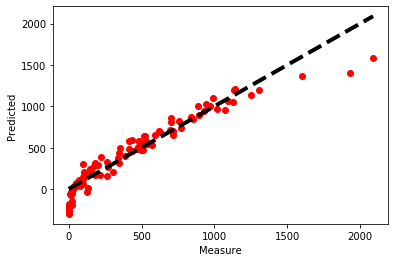

In [516]:
fig,ax=plt.subplots()
ax.scatter(y_test,y_pred,color='red')
ax.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=4)
ax.set_xlabel('Measure')
ax.set_ylabel('Predicted')
plt.show

### The above plot shows the predictions of NBA player points with r2_score(goodness of fit) of 0.9158 